# NEURO TF

## Import packages

To run the notebook locally, [Getting Started](link) could be referred to install the environment and dependencies.

In [1]:
%load_ext autoreload
%autoreload 2

# import packages
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
sys.path.append(srcdir)

import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

## Load the velocity estimation result of all 2,159 genes

To display the prediction in embedding space and to estimate pseudotime by using all genes, all the 2159 genes have already been predicted and could be downloaded from [DentateGyrus_cellDancer_estimation.csv](link). The .csv file could be loaded by ```pd.read_csv()```.

In [25]:
# load the prediction result of all genes
cellDancer_df_file = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/result_detailcsv/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50/celldancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_file)

In [18]:
gene_list_df=pd.read_csv('/Users/shengyuli/Downloads/Mus_musculus_TF.txt',sep='\t')
gene_list=gene_list_df.Symbol

gene_list

filtered_genes=list(cellDancer_df[cellDancer_df.gene_name.isin(gene_list)].gene_name.drop_duplicates())
len(filtered_genes)

gene_list=filtered_genes

## Visualization of sample genes' prediction

Let’s visualize the predicted results pf each gene with ```celldancer.cdplt.gene.scatter_gene()```.

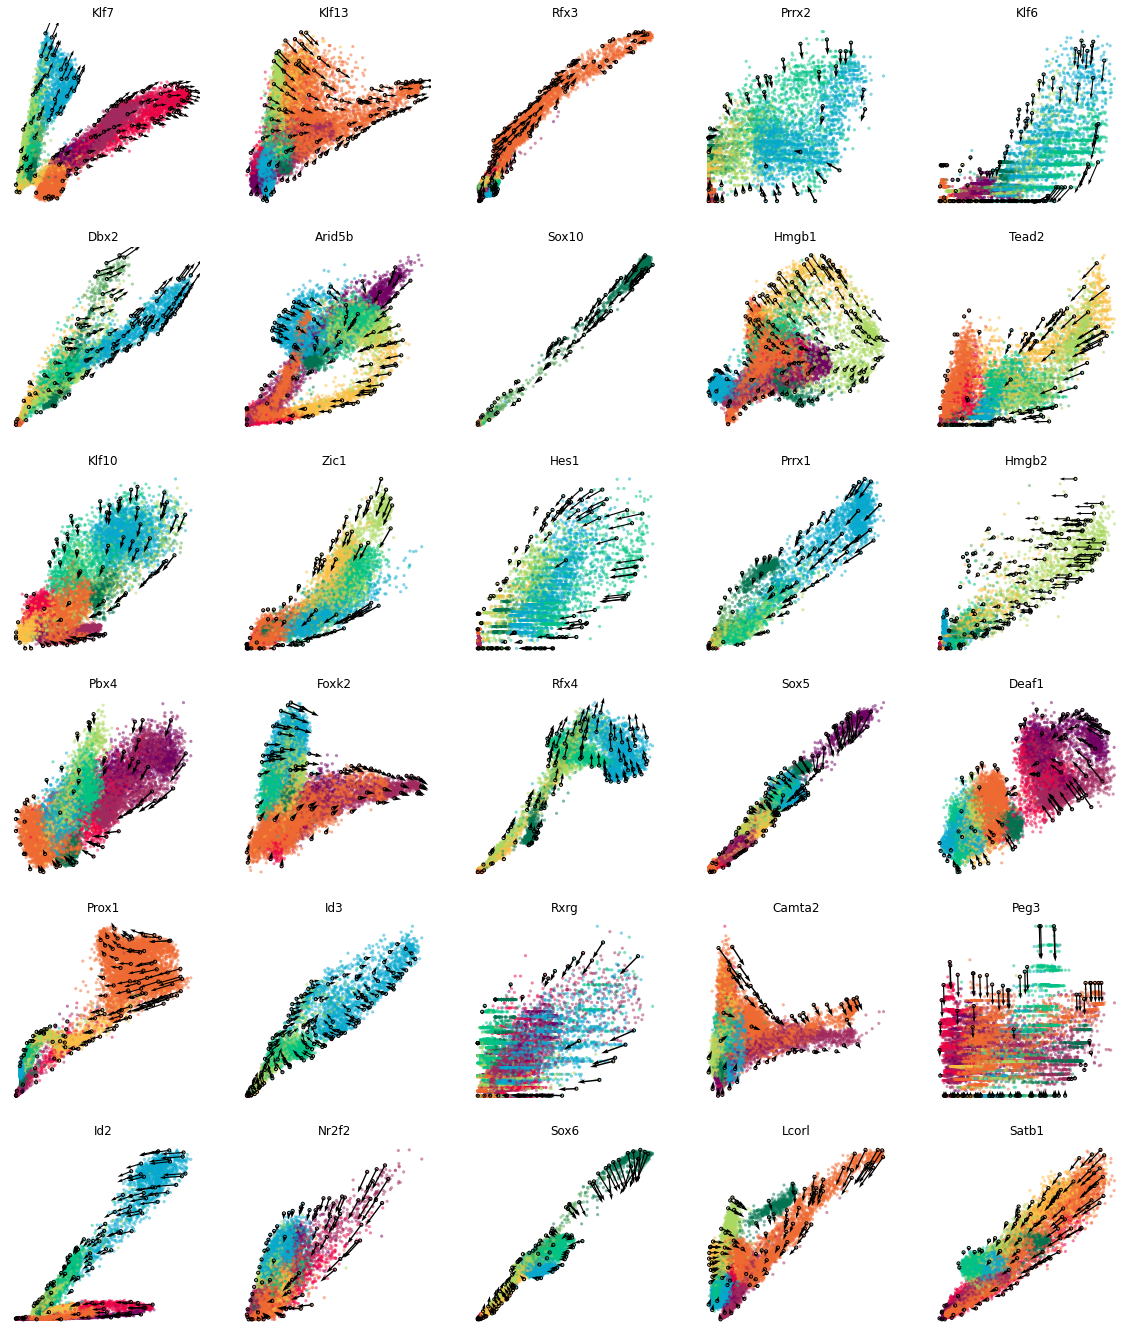

In [19]:
%autoreload 2
ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 10,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Coumpute and visualize the prediction in embedding space

The prediction in the embedding space could be calculated with ```celldancer.compute_cell_velocity.compute()```. If not specified, all genes in cellDancer_df will be used to calculate the prediction in the embedding space. Following the method of [velocyto](https://velocyto.org/velocyto.py/index.html#) and [scVelo](https://scvelo.readthedocs.io/), we project the velocity vectors of the cells into the low-dimensional embedding space.

After the calculation, the predicted direction in the embedding space, i.e. columns 'velocity1' and 'velocity2' will be added to the original dataframe. ```cdplt.cell.scatter_cell()``` could be used to display the predicted direction in embedding space.

In [39]:
%autoreload 2

# Compute cell velocity
cellDancer_df_TF=cd.compute_cell_velocity.compute(cellDancer_df=cellDancer_df,gene_list=filtered_genes,projection_neighbor_size=50)

In [38]:
help(cd.compute_cell_velocity.compute)

Help on function compute in module celldancer.compute_cell_velocity:

compute(cellDancer_df, gene_list=None, speed_up=(60, 60), expression_scale=None, projection_neighbor_size=200, projection_neighbor_choice='embedding')
    Compute the cell velocity.
        
    Arguments
    ---------
    cellDancer_df: `pandas.DataFrame`
        Data frame of velocity estimation results. Columns=['cellIndex', 'gene_name', unsplice', 'splice', 'unsplice_predict', 'splice_predict', 'alpha', 'beta', 'gamma', 'loss', 'cellID, 'clusters', 'embedding1', 'embedding2']
    gene_list: optional, `list` (default: None)
        Genes selected to calculate the cell velocity. None if all genes in the cellDancer_df is to be used.
    speed_up: optional, `tuple` (default: (60,60))
        Speed up by giving the sampling grid to downsample cells. 
        `None` if all cells are used to compute cell velocity. 
    expression_scale: optional, `str` (default: None)
        `None` if no expression scale is to be used.

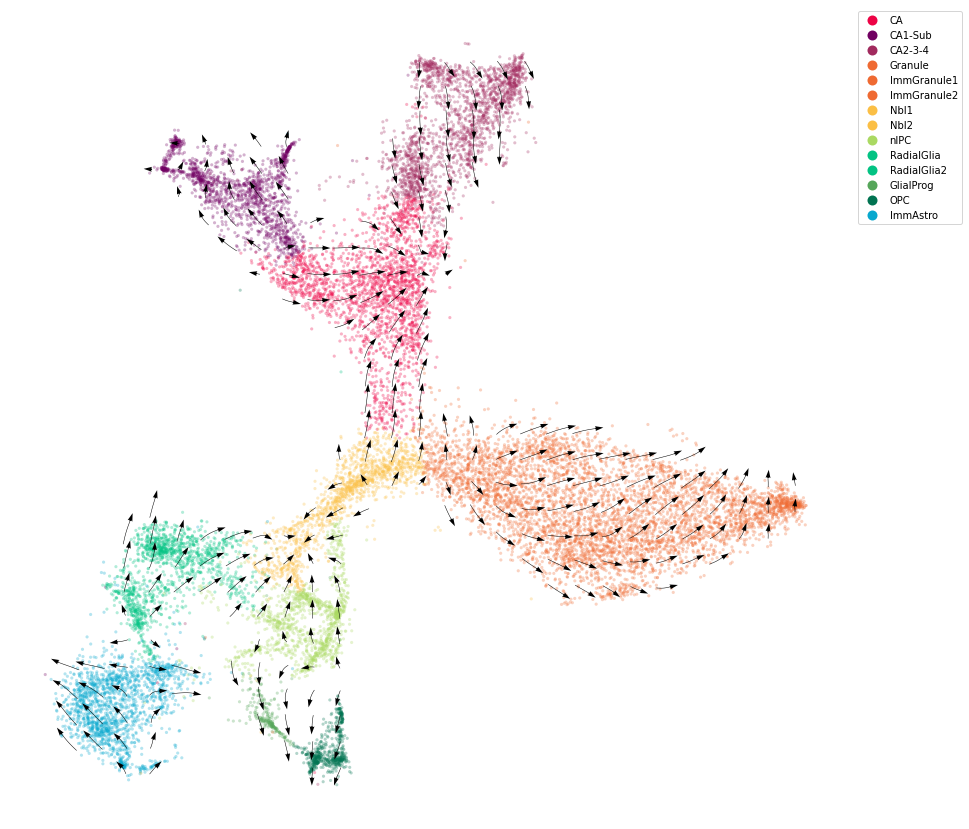

In [40]:
# Plot cell velocity
fig, ax = plt.subplots(figsize=(15,15))
im = cdplt.cell.scatter_cell(ax,cellDancer_df_TF, colors=colormap.colormap_neuro, alpha=0.3, s=10,
             velocity=True, legend='on',min_mass=2,arrow_grid=(30,30))
ax.axis('off')
plt.show()